#Mixup

In [1]:
!pip install Pillow

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt


# 이미지 로드 함수 정의
def load_image(image_path):
    # 이미지를 로드하고 RGB 포맷으로 변환
    image = Image.open(image_path).convert('RGB')
    # 이미지를 numpy 배열로 변환
    return np.array(image)

# mixup 함수 정의
def mixup(x1, x2, y1, y2, lambda_=0.5):
    x = lambda_ * x1 + (1-lambda_) * x2
    y = lambda_ * y1 + (1-lambda_) * y2
    return x, y

concrete_img = Image.open("/content/00027.jpg").convert('RGB')
ship_img = Image.open("/content/101_13_b0328909-0eef-4fda-a97b-4aa54b5fd8a4.JPG").convert('RGB')

concrete_img = np.array(concrete_img)
ship_img = np.array(ship_img)

print(f"Concrete Image Shape: {concrete_img.shape}")
print(f"Ship Image Shape: {ship_img.shape}")

Concrete Image Shape: (227, 227, 3)
Ship Image Shape: (3024, 3024, 3)


In [2]:
# Resize the ship image to match the concrete image shape
ship_img_resized = cv2.resize(ship_img, (concrete_img.shape[1], concrete_img.shape[0]))

print(f"Resized Ship Image Shape: {ship_img_resized.shape}")


Resized Ship Image Shape: (227, 227, 3)


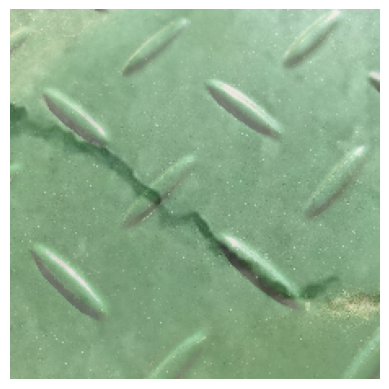

[0.5 0.5]


In [3]:
# 레이블
y1, y2 = np.array([1,0]), np.array([0,1])

# mixup 적용
x, y = mixup(concrete_img, ship_img_resized, y1, y2)

# 이미지 표시
plt.axis('off')
plt.imshow(x.astype(np.uint8))  # numpy 배열을 uint8 타입으로 변환하여 표시
plt.show()
print(y)  # 혼합된 레이블 출력